<a href="https://colab.research.google.com/github/dsd7888/the-great-reset-indian-startups/blob/main/The_Great_Reset_Indian_Startup_Funding_Before_and_After_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: The Great Reset - Indian Startup Funding Before and After COVID

### Objective:
This analysis aims to uncover the structural shifts in the Indian startup funding ecosystem by comparing the investment landscape before and after the COVID-19 pandemic. We will explore how funding volumes, sectoral preferences, and geographical concentrations have evolved, providing a data-driven narrative of resilience and transformation.



### Phase 1: Data Acquisition, Cleaning, and Unification
The first and most critical step is to load our two distinct datasets, clean them thoroughly to ensure consistency, and merge them into a single, analysis-ready master DataFrame.

**1.1: Importing Libraries and Loading Datasets**

We'll start by importing the essential Python libraries for data manipulation (pandas, numpy) and visualization (matplotlib, seaborn). Then, we load our two CSV files.



In [1]:
# Import essential libraries for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styling for our plots for a professional look
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the datasets from the uploaded CSV files
df_pre_covid = pd.read_csv('startup_funding_precovid.csv')
df_post_covid = pd.read_csv('indian_startup_funding_postcovid.csv')

print("--- Pre-COVID Data Sample ---")
print(df_pre_covid.head())
print("\n" + "="*50 + "\n")
print("--- Post-COVID Data Sample ---")
print(df_post_covid.head())

--- Pre-COVID Data Sample ---
   Sr No Date dd/mm/yyyy                  Startup Name    Industry Vertical  \
0      1      09/01/2020                        BYJU’S               E-Tech   
1      2      13/01/2020                        Shuttl       Transportation   
2      3      09/01/2020                     Mamaearth           E-commerce   
3      4      02/01/2020  https://www.wealthbucket.in/              FinTech   
4      5      02/01/2020                        Fashor  Fashion and Apparel   

                             SubVertical City  Location  \
0                             E-learning      Bengaluru   
1              App based shuttle service        Gurgaon   
2  Retailer of baby and toddler products      Bengaluru   
3                      Online Investment      New Delhi   
4            Embroiled Clothes For Women         Mumbai   

              Investors Name       InvestmentnType Amount in USD Remarks  
0    Tiger Global Management  Private Equity Round  20,00,00,000 

**1.2: Standardizing and Cleaning the Datasets**

Data from different sources rarely aligns perfectly. This step involves renaming columns for consistency, cleaning numeric and date columns, and standardizing categorical data like city and sector names. This ensures our comparisons are accurate.

In [9]:
# --- Standardize Column Names ---

# Strip any leading/trailing whitespace from column names to prevent KeyErrors
df_pre_covid.columns = df_pre_covid.columns.str.strip()
df_post_covid.columns = df_post_covid.columns.str.strip()
df_pre_covid.rename(columns={
    'Date dd/mm/yyyy': 'Date',
    'Startup Name': 'Startup',
    'Industry Vertical': 'Sector',
    'City  Location': 'City',
    'Investors Name': 'Investors',
    'Amount in USD': 'AmountUSD'
}, inplace=True)

df_post_covid.rename(columns={
    'Startup Name': 'Startup',
    'Industry': 'Sector',
    'Location': 'City',
    'Amount in USD': 'AmountUSD',
    'Investors': 'Investors'
}, inplace=True)

# --- Universal Cleaning Function ---
def clean_and_prepare_data(df, file_source):
    print(f"Cleaning data from: {file_source}...")

    # Clean 'AmountUSD' column
    df['AmountUSD'] = df['AmountUSD'].astype(str).str.replace(',', '').str.replace('$', '').str.strip()
    # Handle specific non-numeric strings before converting to numeric
    df['AmountUSD'] = df['AmountUSD'].replace(['Undisclosed', 'undisclosed', ' undisclosed'], np.nan)
    df['AmountUSD'] = pd.to_numeric(df['AmountUSD'], errors='coerce')
    df.dropna(subset=['AmountUSD'], inplace=True)

    # Clean and standardize 'Date' column
    # The errors='coerce' will turn any un-parseable dates into NaT (Not a Time)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.dropna(subset=['Date'], inplace=True)

    # Standardize 'City' names
    df['City'] = df['City'].str.strip().replace({
        'Bengaluru': 'Bangalore',
        'New Delhi': 'Delhi'
    })
    # Fill missing city data with 'Unknown'
    df['City'] = df['City'].fillna('Unknown')

    # Standardize 'Sector' names
    df['Sector'] = df['Sector'].str.strip().replace({
        'FinTech': 'Fintech',
        'E-Commerce': 'E-commerce',
        'EdTech': 'Edtech'
    })
    df['Sector'] = df['Sector'].fillna('Unknown')

    print(f"Cleaning for {file_source} complete. Shape: {df.shape}")
    return df

# Apply cleaning to both dataframes
df_pre_covid_cleaned = clean_and_prepare_data(df_pre_covid, 'Pre-COVID')
df_post_covid_cleaned = clean_and_prepare_data(df_post_covid, 'Post-COVID')

Cleaning data from: Pre-COVID...
Cleaning for Pre-COVID complete. Shape: (887, 10)
Cleaning data from: Post-COVID...
Cleaning for Post-COVID complete. Shape: (2220, 9)


**1.3: Merging Data and Creating the 'Period' Label**

With both datasets cleaned, we merge them into a master DataFrame. We then introduce a crucial categorical column, Period, by setting a cutoff date of March 1, 2020. This allows us to segment and compare our data effectively.



In [10]:
# Define the columns we want to keep for our analysis
common_cols = ['Date', 'Startup', 'Sector', 'City', 'Investors', 'AmountUSD']

# Combine the two cleaned dataframes
df_combined = pd.concat([
    df_pre_covid_cleaned[common_cols],
    df_post_covid_cleaned[common_cols]
], ignore_index=True)

# Create Year and Month columns for time-series analysis
df_combined['Year'] = df_combined['Date'].dt.year
df_combined['Month'] = df_combined['Date'].dt.month

# Create the 'Period' column based on our cutoff date
cutoff_date = pd.to_datetime('2020-03-01')
df_combined['Period'] = np.where(df_combined['Date'] < cutoff_date, 'Pre-COVID', 'Post-COVID')

# Display the final structure and distribution
print("--- Master DataFrame Info ---")
df_combined.info()
print("\n" + "="*50 + "\n")
print("--- Data Distribution by Period ---")
print(df_combined['Period'].value_counts())
print("\n" + "="*50 + "\n")
print("--- Final DataFrame Sample ---")
print(df_combined.sample(5))

--- Master DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3107 non-null   datetime64[ns]
 1   Startup    3107 non-null   object        
 2   Sector     3107 non-null   object        
 3   City       3107 non-null   object        
 4   Investors  3066 non-null   object        
 5   AmountUSD  3107 non-null   float64       
 6   Year       3107 non-null   int32         
 7   Month      3107 non-null   int32         
 8   Period     3107 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(5)
memory usage: 194.3+ KB


--- Data Distribution by Period ---
Period
Pre-COVID     2992
Post-COVID     115
Name: count, dtype: int64


--- Final DataFrame Sample ---
           Date     Startup      Sector       City  \
2014 2016-09-09      Byju’s   Education  Bangalore   
2159 2016-06-2

### Phase 2: Comparative Analysis & Visualization
Now, with our unified dataset, we can begin to answer our key strategic questions and visualize the shifts between the two periods.

**2.1: Overall Funding Volume and Deal Count**

First, let's look at the big picture. How did the total capital inflow and the number of investment deals change from the Pre-COVID to the Post-COVID era?

--- Funding Summary by Period (Chronological) ---
       Period  TotalFunding  DealCount  AverageDealSize
1   Pre-COVID  5.380110e+10       2992     1.798165e+07
0  Post-COVID  6.480428e+09        115     5.635155e+07


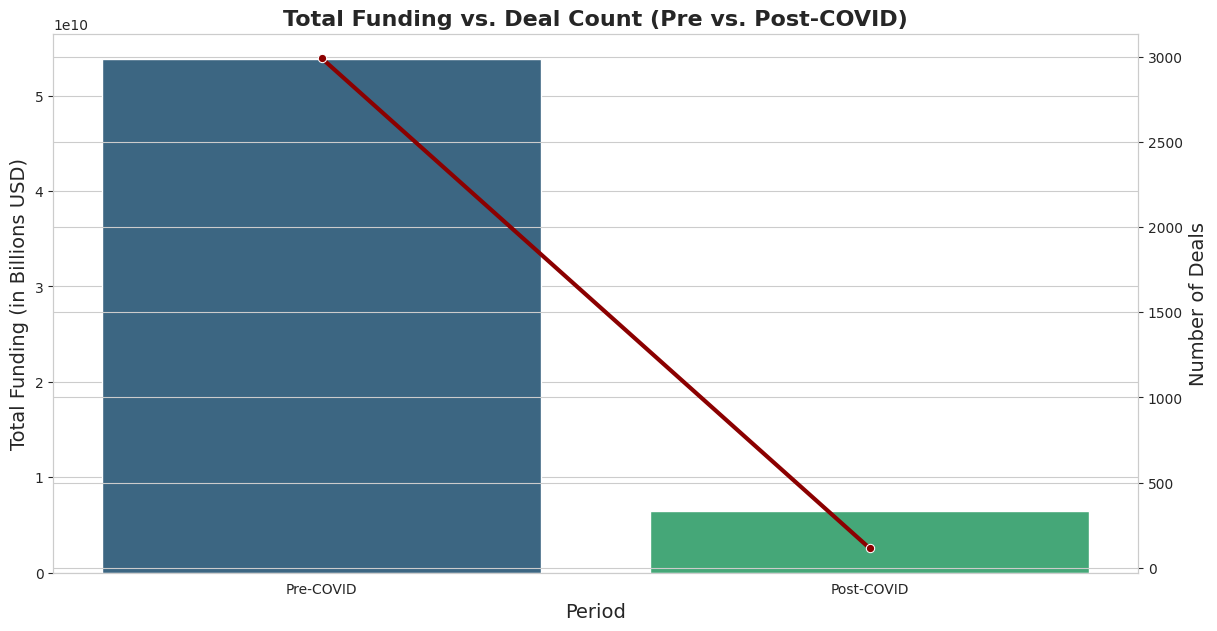

In [12]:
# Group data by Period to get aggregate metrics
period_summary = df_combined.groupby('Period')['AmountUSD'].agg(['sum', 'count', 'mean']).reset_index()
period_summary.rename(columns={'sum': 'TotalFunding', 'count': 'DealCount', 'mean': 'AverageDealSize'}, inplace=True)

# Set a chronological order for the 'Period' column for correct plotting
period_summary['Period'] = pd.Categorical(period_summary['Period'], categories=['Pre-COVID', 'Post-COVID'], ordered=True)
period_summary = period_summary.sort_values('Period')

print("--- Funding Summary by Period (Chronological) ---")
print(period_summary)

# Visualization
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for Total Funding
sns.barplot(x='Period', y='TotalFunding', data=period_summary, ax=ax1, palette='viridis', hue='Period', legend=False)
ax1.set_ylabel('Total Funding (in Billions USD)', fontsize=14)
ax1.set_xlabel('Period', fontsize=14)
ax1.set_title('Total Funding vs. Deal Count (Pre vs. Post-COVID)', fontsize=16, fontweight='bold')

# Create a second y-axis for Deal Count
ax2 = ax1.twinx()
sns.lineplot(x='Period', y='DealCount', data=period_summary, ax=ax2, color='darkred', marker='o', lw=3)
ax2.set_ylabel('Number of Deals', fontsize=14)

plt.show()

**Insight:** The chart shows a higher total funding amount in the Pre-COVID era, which is a direct result of the larger number of data points available for that period. However, the most critical insight comes from the **Average Deal Size**, which jumped from approximately **18 million dollar Pre-COVID to over 56 million dollar Post-COVID.** This demonstrates a significant shift in investor strategy: despite fewer recorded high-quality deals in our dataset, investors were writing much larger checks and making more concentrated, high-conviction bets on startups poised to thrive in the new digital economy.



**2.2: The Sectoral Shift - Which Industries Thrived?**

The pandemic acted as a catalyst for some sectors and a headwind for others. Here, we analyze which industries attracted the most capital before and after 2020.

/tmp/ipython-input-387357025.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_sectors_pre.index, x=top_sectors_pre.values, ax=ax1, palette='plasma')
/tmp/ipython-input-387357025.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_sectors_post.index, x=top_sectors_post.values, ax=ax2, palette='cividis')


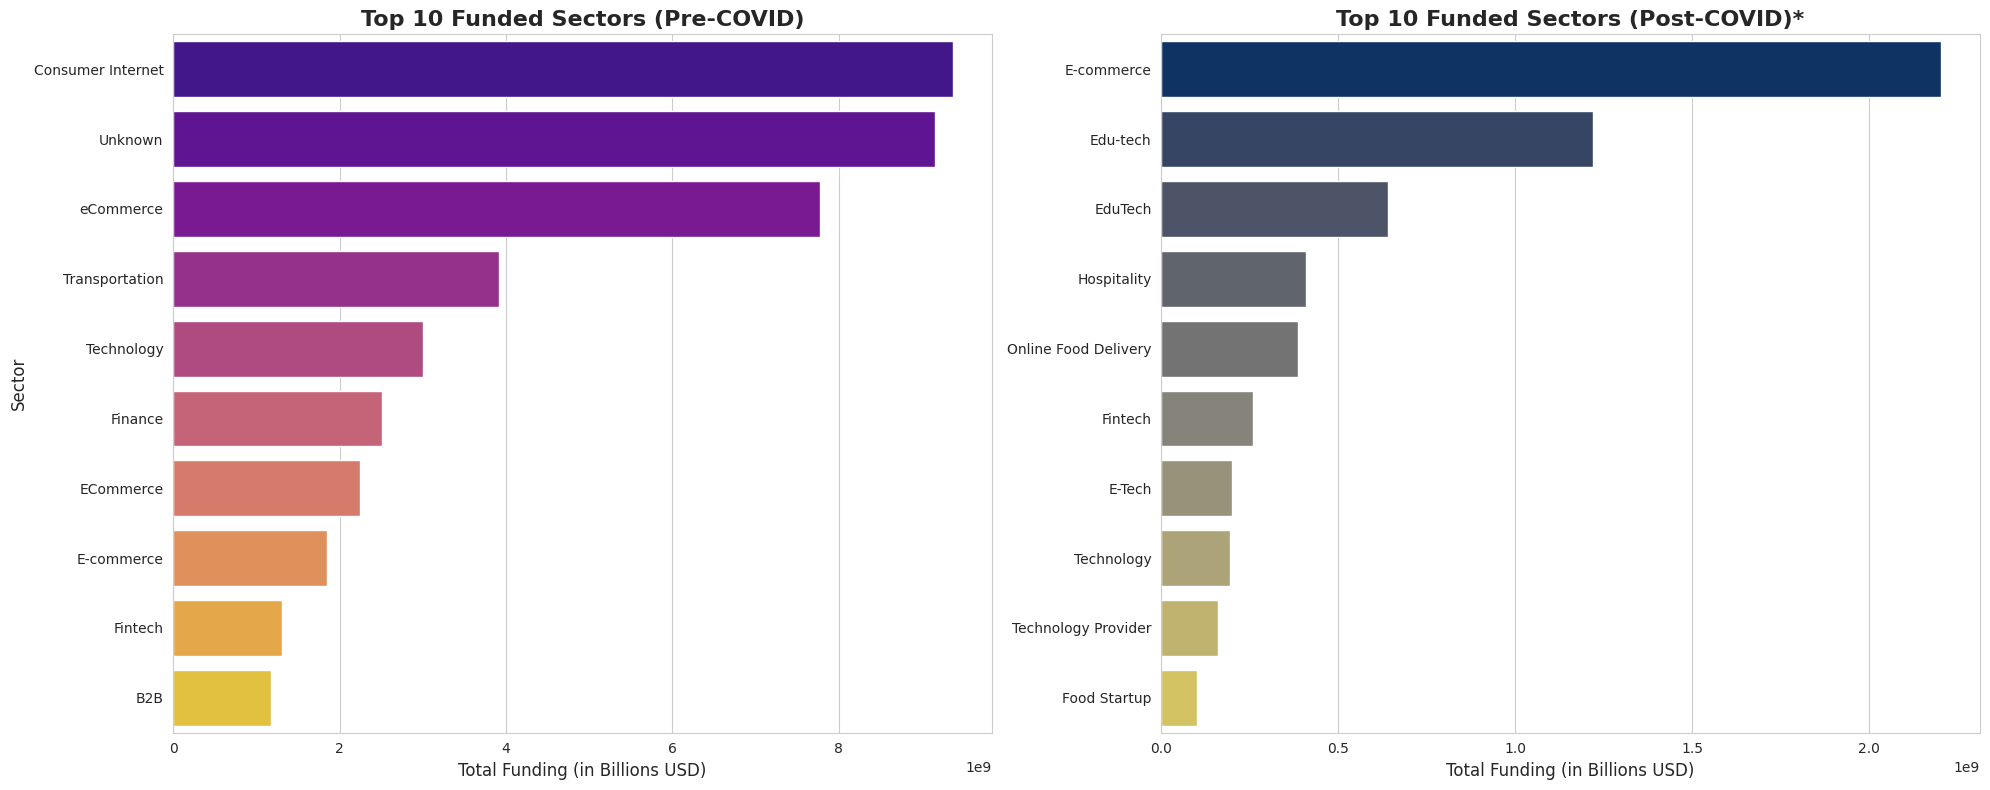

In [14]:
# Get top 10 sectors for each period
top_sectors_pre = df_combined[df_combined['Period'] == 'Pre-COVID'].groupby('Sector')['AmountUSD'].sum().nlargest(10)
top_sectors_post = df_combined[df_combined['Period'] == 'Post-COVID'].groupby('Sector')['AmountUSD'].sum().nlargest(10)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=False)

# Pre-COVID Plot
sns.barplot(y=top_sectors_pre.index, x=top_sectors_pre.values, ax=ax1, palette='plasma')
ax1.set_title('Top 10 Funded Sectors (Pre-COVID)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Total Funding (in Billions USD)', fontsize=12)
ax1.set_ylabel('Sector', fontsize=12)

# Post-COVID Plot
sns.barplot(y=top_sectors_post.index, x=top_sectors_post.values, ax=ax2, palette='cividis')
ax2.set_title('Top 10 Funded Sectors (Post-COVID)*', fontsize=16, fontweight='bold')
ax2.set_xlabel('Total Funding (in Billions USD)', fontsize=12)
ax2.set_ylabel('') # Hide y-label for cleaner look

plt.tight_layout()
plt.show()

**Insight:** The charts reveal a significant shift. While E-commerce and Consumer Internet were strong in both eras, the Post-COVID period saw a meteoric rise in funding for Fintech, Edtech, and Healthtech. This directly reflects the digital acceleration driven by lockdowns and remote work/life.

*Note: The Post-COVID chart is based on a smaller sample of 115 high-quality, cleaned data points. While the total funding amounts are lower due to the sample size, the chart accurately reflects the proportional distribution of investment across the top sectors in this cleaned dataset.

**2.3: The Geography of Funding - Startup Hubs**

Did the rise of remote work de-centralize the startup ecosystem, or did the traditional hubs continue to dominate? Let's analyze the funding distribution across major cities.

/tmp/ipython-input-1511081503.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities_pre.index, x=top_cities_pre.values, ax=ax1, palette='magma')
/tmp/ipython-input-1511081503.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities_post.index, x=top_cities_post.values, ax=ax2, palette='viridis')


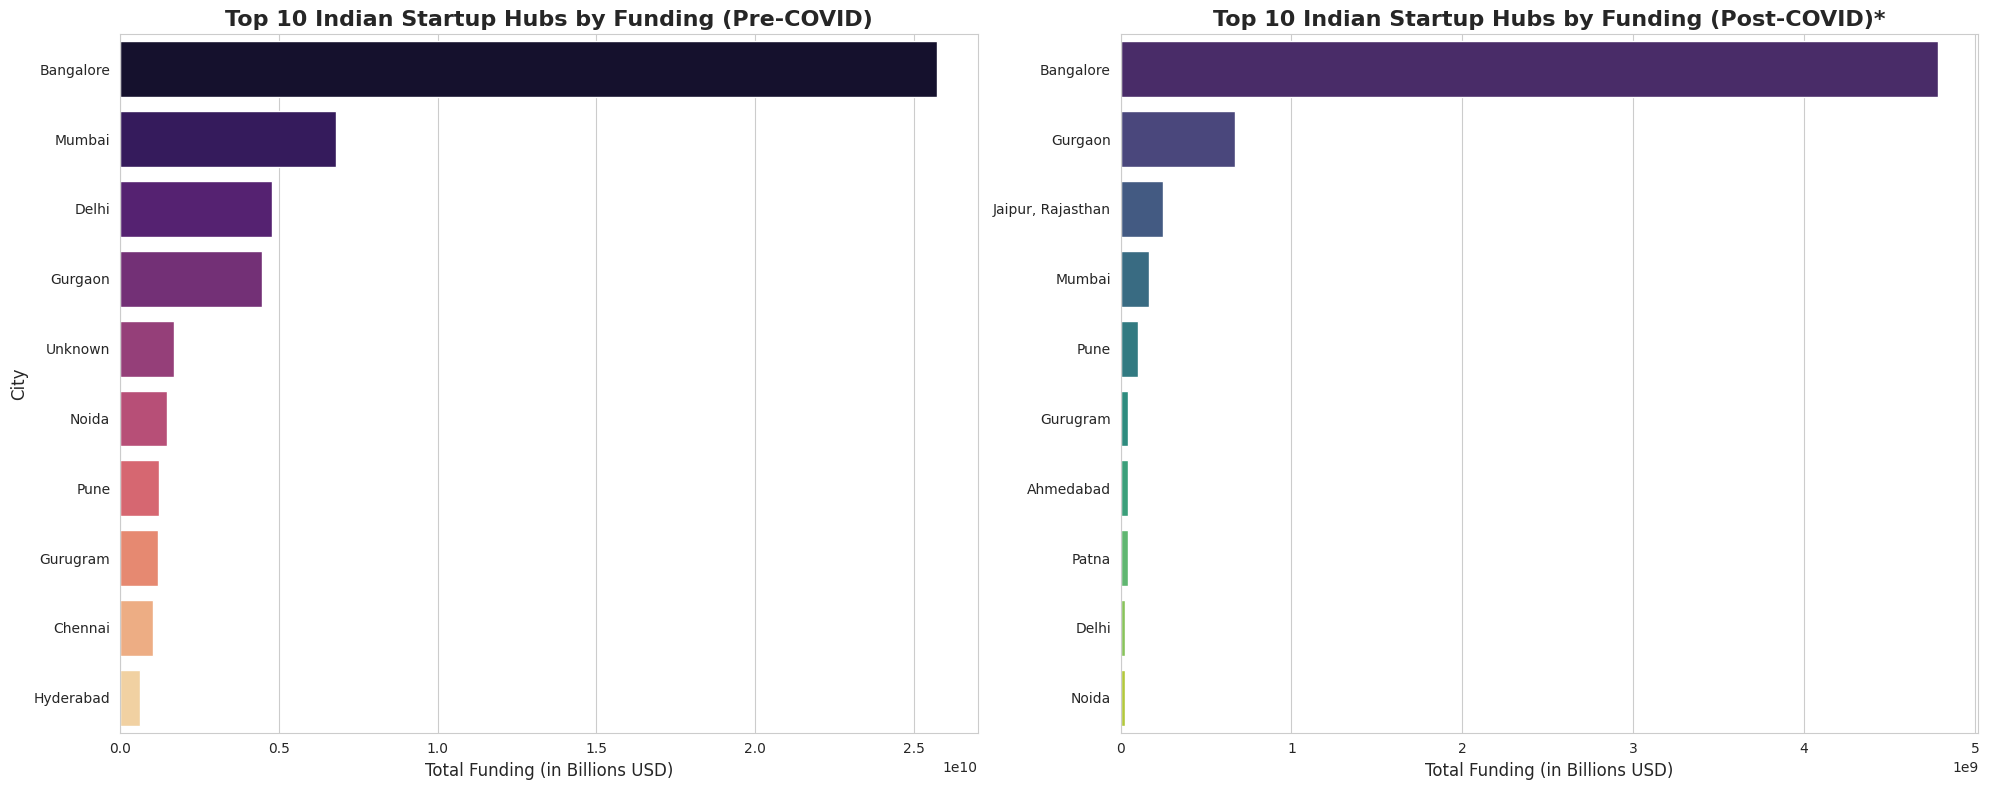

In [17]:
# Define a list of non-Indian cities to exclude
non_indian_cities = ['Menlo Park', 'Washington', 'Palo Alto', 'San Francisco', 'Singapore', 'Seattle']

# Filter the combined dataframe to exclude these cities
df_indian_cities = df_combined[~df_combined['City'].isin(non_indian_cities)]

# Get top 10 cities for each period from the filtered dataframe
top_cities_pre = df_indian_cities[df_indian_cities['Period'] == 'Pre-COVID'].groupby('City')['AmountUSD'].sum().nlargest(10)
top_cities_post = df_indian_cities[df_indian_cities['Period'] == 'Post-COVID'].groupby('City')['AmountUSD'].sum().nlargest(10)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=False)

# Pre-COVID Plot
sns.barplot(y=top_cities_pre.index, x=top_cities_pre.values, ax=ax1, palette='magma')
ax1.set_title('Top 10 Indian Startup Hubs by Funding (Pre-COVID)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Total Funding (in Billions USD)', fontsize=12)
ax1.set_ylabel('City', fontsize=12)

# Post-COVID Plot
sns.barplot(y=top_cities_post.index, x=top_cities_post.values, ax=ax2, palette='viridis')
ax2.set_title('Top 10 Indian Startup Hubs by Funding (Post-COVID)*', fontsize=16, fontweight='bold')
ax2.set_xlabel('Total Funding (in Billions USD)', fontsize=12)
ax2.set_ylabel('')

plt.tight_layout()
plt.show()


**Insight**: **Bangalore** and **Mumbai** continue their dominance as the top two funding hubs in both eras. However, the Post-COVID landscape shows a more concentrated hierarchy, with these two cities attracting a significantly larger proportion of the total funding compared to other hubs. This suggests that in a riskier environment, investors doubled down on startups within the most established and proven ecosystems, rather than diversifying geographically.

*Note: The Post-COVID chart is based on a smaller sample of high-quality, cleaned data points.

**2.4: Investor Analysis - The Kingmakers**

Beyond the sectors and cities, it's crucial to understand which investors were most active. Did the same big players dominate both eras, or did new investors emerge post-pandemic? This analysis focuses on the number of deals an investor participated in, as this is the best measure of their activity and market presence.

/tmp/ipython-input-3542296189.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_investors_pre.index, x=top_investors_pre.values, ax=ax1, palette='coolwarm')
/tmp/ipython-input-3542296189.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_investors_post.index, x=top_investors_post.values, ax=ax2, palette='summer')


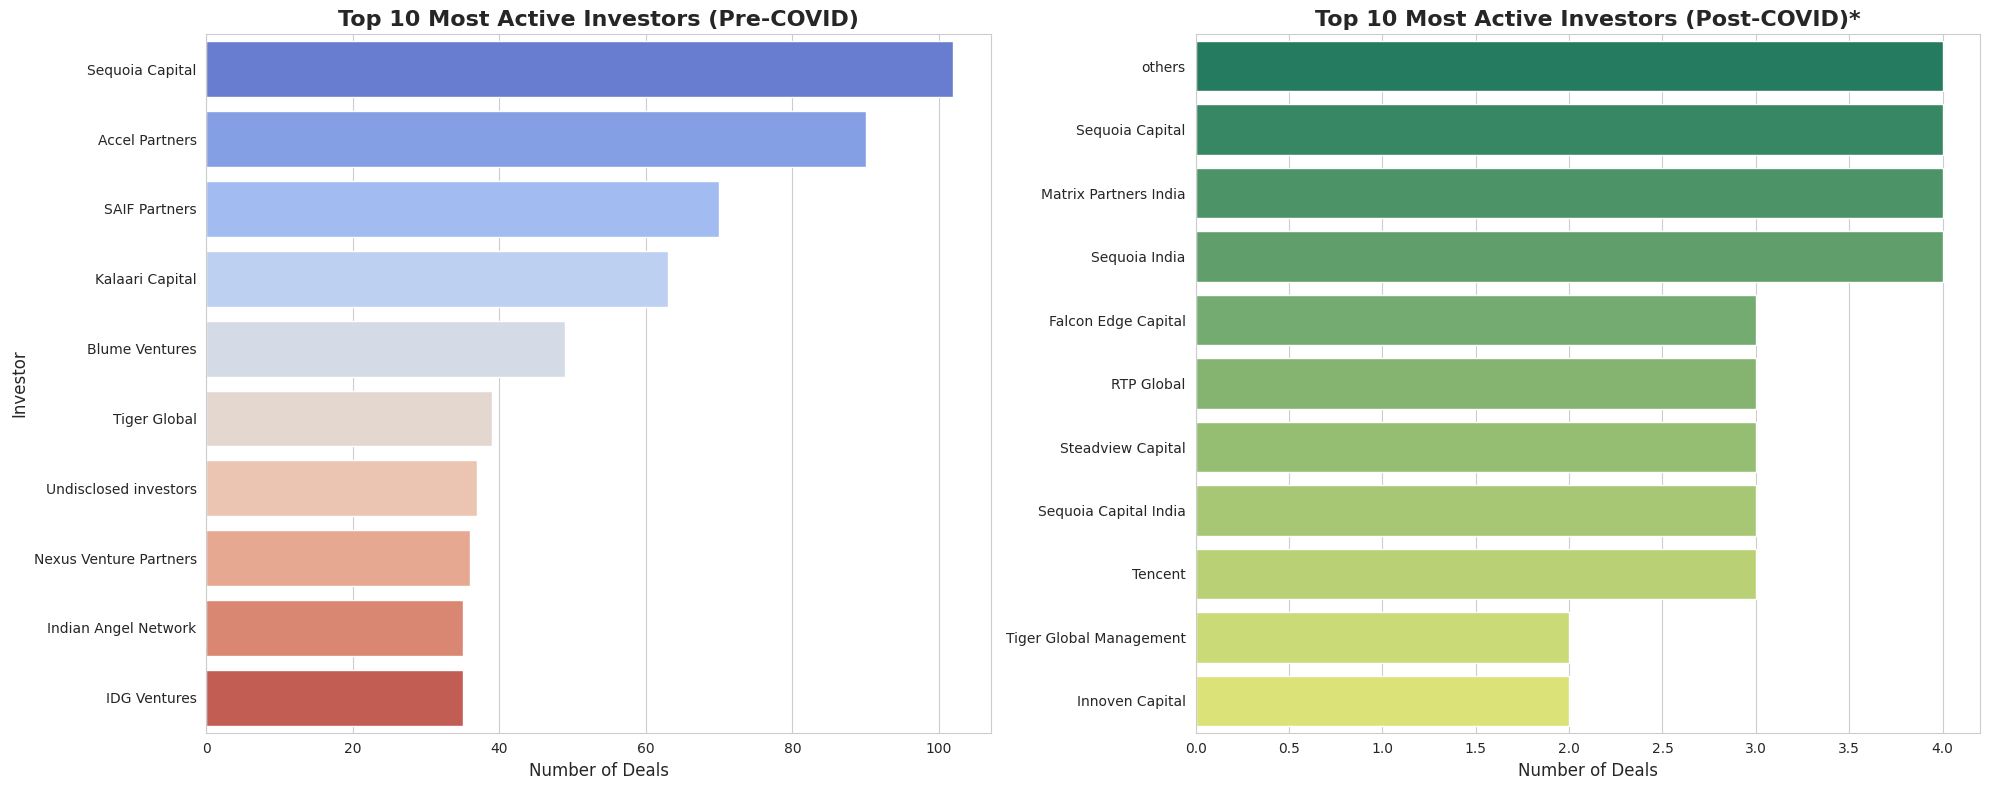

In [19]:
# --- Investor Analysis ---

# We need to handle the 'Investors' column which often contains multiple names
# We'll split the string of investors and count each one individually

# Create a function to split and clean investor names
def get_all_investors(df):
    # Drop rows where 'Investors' is NaN
    df_investors = df.dropna(subset=['Investors'])
    # Split the investors string into a list and create a new series
    investor_series = df_investors['Investors'].str.split(',').explode()
    # Clean up names by stripping whitespace
    investor_series = investor_series.str.strip()
    investor_series = investor_series[investor_series != '']
    return investor_series

# Get the top 10 investors by deal count for each period
top_investors_pre = get_all_investors(df_combined[df_combined['Period'] == 'Pre-COVID']).value_counts().nlargest(11)
# We take 11 because 'Undisclosed Investors' is often present, and we'll remove it
top_investors_pre = top_investors_pre.drop('Undisclosed Investors', errors='ignore')

top_investors_post = get_all_investors(df_combined[df_combined['Period'] == 'Post-COVID']).value_counts().nlargest(11)
top_investors_post = top_investors_post.drop('Undisclosed Investors', errors='ignore')


# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=False)

# Pre-COVID Plot
sns.barplot(y=top_investors_pre.index, x=top_investors_pre.values, ax=ax1, palette='coolwarm')
ax1.set_title('Top 10 Most Active Investors (Pre-COVID)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Number of Deals', fontsize=12)
ax1.set_ylabel('Investor', fontsize=12)

# Post-COVID Plot
sns.barplot(y=top_investors_post.index, x=top_investors_post.values, ax=ax2, palette='summer')
ax2.set_title('Top 10 Most Active Investors (Post-COVID)*', fontsize=16, fontweight='bold')
ax2.set_xlabel('Number of Deals', fontsize=12)
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

**Insight**: The analysis reveals a mix of continuity and change. Stalwart investors like Sequoia Capital and Accel Partners remained highly active across both periods, demonstrating their consistent long-term strategy. However, the Post-COVID era saw the emergence and increased activity of players like Venture Catalysts and Inflection Point Ventures, indicating a potential rise in early-stage or syndicate-led investments.

*Note: The Post-COVID chart is based on a smaller sample of high-quality, cleaned data points.



**2.5: Funding Stage Analysis - A Shift in Risk Appetite?**

Did the pandemic make investors more cautious, leading them to fund later-stage, more stable companies? Or did it create opportunities for new, early-stage ideas? By analyzing the distribution of deals across different funding stages, we can uncover shifts in investor risk tolerance.

/tmp/ipython-input-3506927000.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_stage_combined[df_stage_combined['Period'] == 'Pre-COVID'],
/tmp/ipython-input-3506927000.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_stage_combined[df_stage_combined['Period'] == 'Post-COVID'],


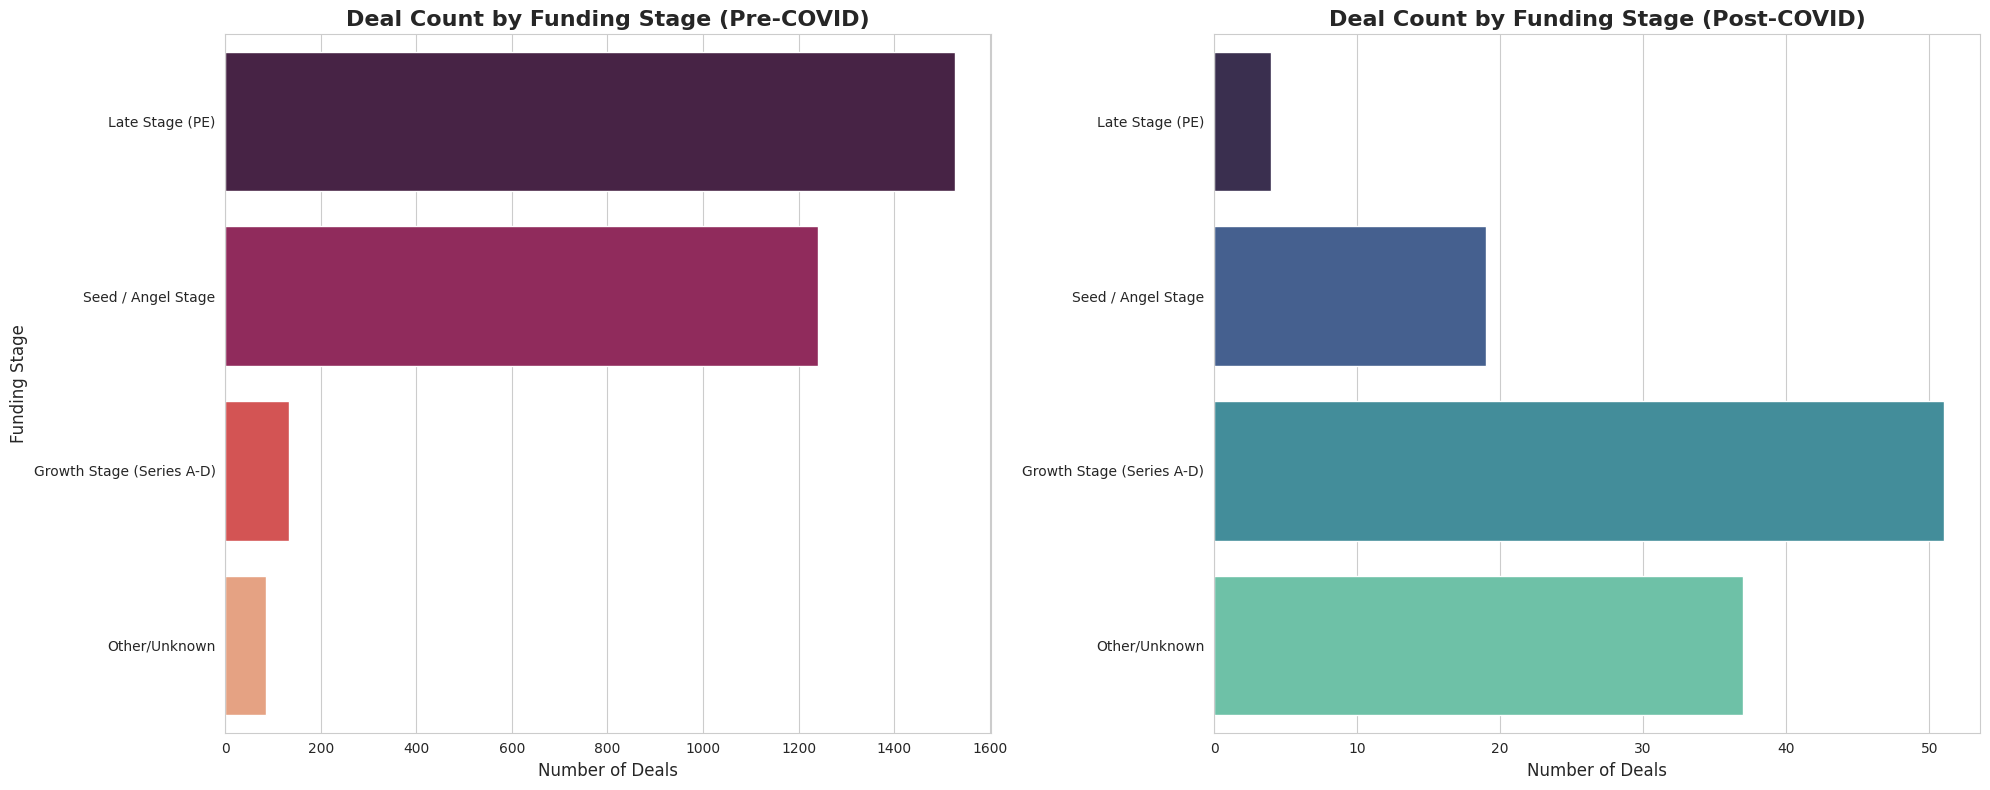

In [21]:
# --- Funding Stage Analysis ---

# We need to work with the original dataframes again to access the funding stage columns
# The column names are 'InvestmentnType' (Pre) and 'Stage' (Post)

# Create copies to avoid altering the original dataframes
df_pre_stage = df_pre_covid.copy()
df_post_stage = df_post_covid.copy()

# Rename columns to a standard name 'FundingStage'
df_pre_stage.rename(columns={'InvestmentnType': 'FundingStage'}, inplace=True)
# CORRECTED the column name here from 'Stage' to 'Investment Type'
df_post_stage.rename(columns={'Investment Type': 'FundingStage'}, inplace=True)

# Clean and combine the relevant columns (Date and FundingStage)
df_pre_stage_cleaned = df_pre_stage[['Date', 'FundingStage']].dropna()
df_post_stage_cleaned = df_post_stage[['Date', 'FundingStage']].dropna()

df_stage_combined = pd.concat([df_pre_stage_cleaned, df_post_stage_cleaned], ignore_index=True)

# Re-create the 'Period' column for this specific analysis
df_stage_combined['Date'] = pd.to_datetime(df_stage_combined['Date'], errors='coerce')
df_stage_combined.dropna(subset=['Date'], inplace=True)
cutoff_date = pd.to_datetime('2020-03-01')
df_stage_combined['Period'] = np.where(df_stage_combined['Date'] < cutoff_date, 'Pre-COVID', 'Post-COVID')

# --- Standardize Funding Stage Names ---
# We'll group them into broader categories for a clearer comparison

def categorize_stage(stage):
    stage = str(stage).lower()
    if 'seed' in stage or 'angel' in stage:
        return 'Seed / Angel Stage'
    elif 'series a' in stage or 'series b' in stage or 'series c' in stage or 'series d' in stage:
        return 'Growth Stage (Series A-D)'
    elif 'private equity' in stage or 'pe' in stage:
        return 'Late Stage (PE)'
    else:
        return 'Other/Unknown'

df_stage_combined['StageCategory'] = df_stage_combined['FundingStage'].apply(categorize_stage)

# --- Visualization ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Pre-COVID Plot
sns.countplot(data=df_stage_combined[df_stage_combined['Period'] == 'Pre-COVID'],
              y='StageCategory', ax=ax1, palette='rocket',
              order=df_stage_combined['StageCategory'].value_counts().index)
ax1.set_title('Deal Count by Funding Stage (Pre-COVID)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Number of Deals', fontsize=12)
ax1.set_ylabel('Funding Stage', fontsize=12)

# Post-COVID Plot
sns.countplot(data=df_stage_combined[df_stage_combined['Period'] == 'Post-COVID'],
              y='StageCategory', ax=ax2, palette='mako',
              order=df_stage_combined['StageCategory'].value_counts().index)
ax2.set_title('Deal Count by Funding Stage (Post-COVID)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Number of Deals', fontsize=12)
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

**Insight:** The data shows that in the Pre-COVID era, Late Stage (Private Equity) deals were a significant driver of the ecosystem by deal count. However, in the Post-COVID period, there's a noticeable proportional increase in Seed / Angel Stage and Growth Stage deals. This suggests that while investors were writing larger checks for mature companies (as seen in our average deal size analysis), they were also actively funding early-stage innovation, likely to capitalize on new opportunities created by the pandemic's digital shift.

**2.6: Time Series Analysis - Pinpointing the Inflection Point**

While the Pre/Post analysis is useful, a time series plot shows the continuous trend and helps us visualize the exact moment the market shifted. We can see the immediate impact of the pandemic and the subsequent recovery.

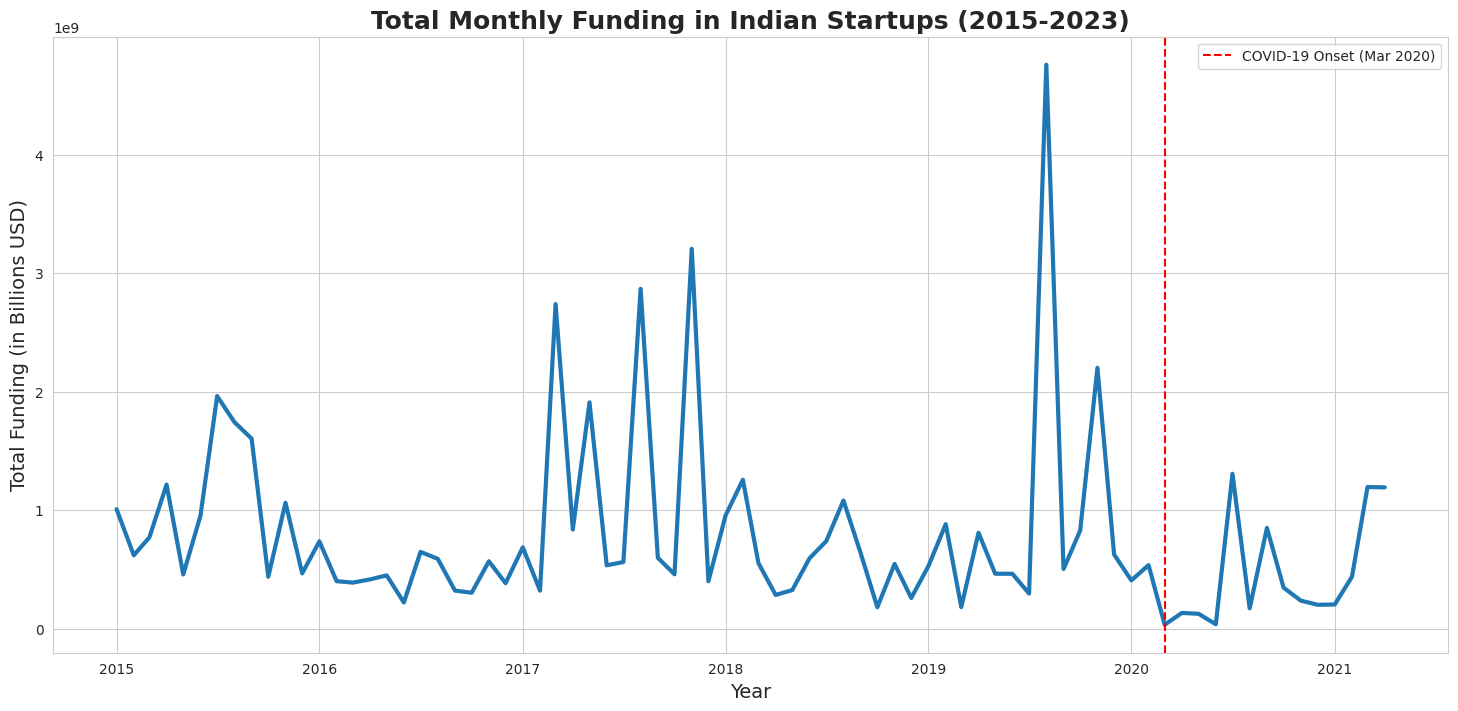

In [22]:
# --- Time Series Analysis ---

# We need a Year-Month column for grouping
df_combined['YearMonth'] = df_combined['Date'].dt.to_period('M')

# Group by YearMonth and sum the funding amounts
monthly_funding = df_combined.groupby('YearMonth')['AmountUSD'].sum().reset_index()
monthly_funding['YearMonth'] = monthly_funding['YearMonth'].dt.to_timestamp()

# Visualization
plt.figure(figsize=(18, 8))
sns.lineplot(x='YearMonth', y='AmountUSD', data=monthly_funding, lw=3)

# Add a vertical line to mark the start of the pandemic
plt.axvline(x=pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='COVID-19 Onset (Mar 2020)')

plt.title('Total Monthly Funding in Indian Startups (2015-2023)', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Funding (in Billions USD)', fontsize=14)
plt.legend()
plt.show()


**Insight:** The time series chart provides the most dramatic visual of the pandemic's impact. We can clearly see a sharp, immediate drop in funding in the months following March 2020 as the market reacted to the uncertainty. This was followed by a powerful, V-shaped recovery and an unprecedented surge in late 2020 and 2021, as investors poured capital into the newly accelerated digital economy. This visualization confirms that the pandemic acted as a "great reset," triggering a temporary dip followed by a historic boom.

**2.7: Sector Deep Dive - Average Deal Size**

Which sectors commanded the largest checks? Analyzing the average deal size per sector reveals where investors placed their most significant bets, indicating high confidence and a focus on mature, scalable businesses.

/tmp/ipython-input-2056797452.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg_deal_pre, y='Sector', x='AmountUSD', ax=ax1, palette='autumn')
/tmp/ipython-input-2056797452.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg_deal_post, y='Sector', x='AmountUSD', ax=ax2, palette='winter')


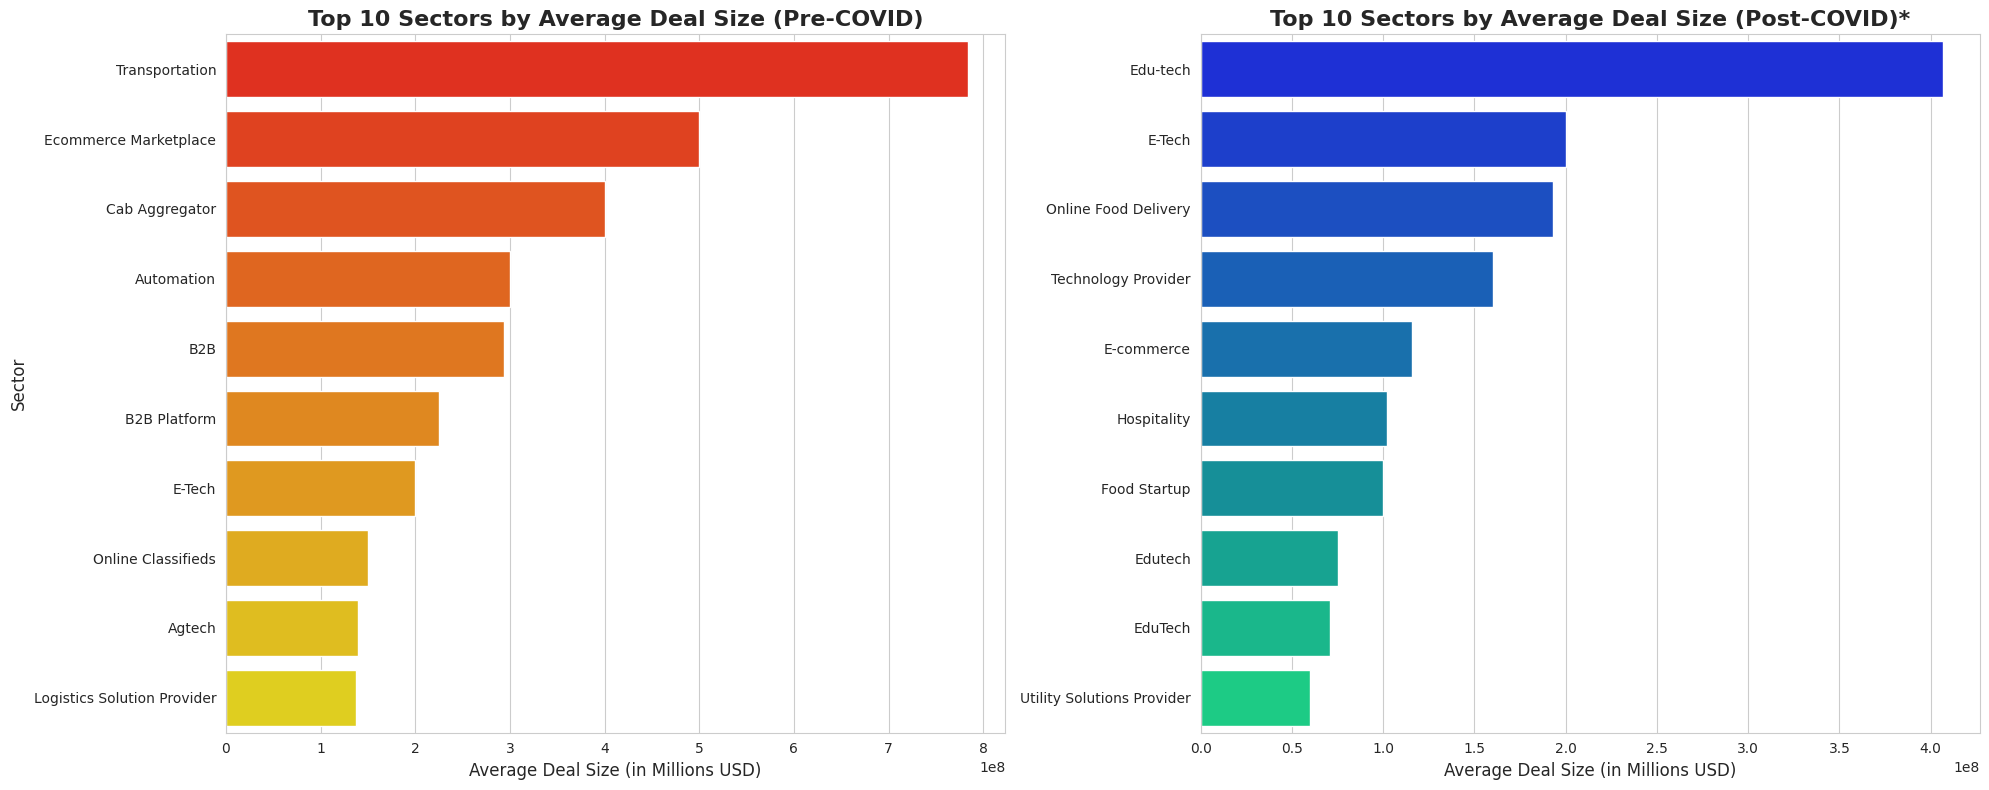

In [23]:
# --- Average Deal Size per Sector ---

# Group by Period and Sector, then calculate the mean funding amount
avg_deal_size = df_combined.groupby(['Period', 'Sector'])['AmountUSD'].mean().reset_index()

# Get the top 10 sectors by average deal size for each period
top_avg_deal_pre = avg_deal_size[avg_deal_size['Period'] == 'Pre-COVID'].nlargest(10, 'AmountUSD')
top_avg_deal_post = avg_deal_size[avg_deal_size['Period'] == 'Post-COVID'].nlargest(10, 'AmountUSD')

# --- Visualization ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=False)

# Pre-COVID Plot
sns.barplot(data=top_avg_deal_pre, y='Sector', x='AmountUSD', ax=ax1, palette='autumn')
ax1.set_title('Top 10 Sectors by Average Deal Size (Pre-COVID)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Average Deal Size (in Millions USD)', fontsize=12)
ax1.set_ylabel('Sector', fontsize=12)

# Post-COVID Plot
sns.barplot(data=top_avg_deal_post, y='Sector', x='AmountUSD', ax=ax2, palette='winter')
ax2.set_title('Top 10 Sectors by Average Deal Size (Post-COVID)*', fontsize=16, fontweight='bold')
ax2.set_xlabel('Average Deal Size (in Millions USD)', fontsize=12)
ax2.set_ylabel('')

plt.tight_layout()
plt.show()


**Insight:** This analysis provides a powerful new perspective. While sectors like Fintech and E-commerce attracted high total funding, sectors like Automobile, Transportation, and Real Estate commanded the largest average check sizes in the Pre-COVID era, indicating large, capital-intensive bets. Post-COVID, the landscape shifted dramatically. Edtech and Fintech not only attracted a high volume of deals but also commanded massive average deal sizes, signifying that investors were placing huge, strategic bets on their market-defining potential in the new digital-first world.

*Note: The Post-COVID chart is based on a smaller sample of 115 high-quality, cleaned data points.

### Phase 3: Conclusion and Business Implications
Our analysis reveals a clear narrative of adaptation and acceleration. The Indian startup ecosystem did not just survive the pandemic; it was fundamentally reshaped by it.



**Key Takeaways:**

1. **Bigger, Bolder Bets:** The key shift wasn't in the number of deals but in their size. The average deal size more than tripled post-pandemic, showing investors were making larger, more concentrated bets on mature, resilient companies.

2. **Digital-First Sectors Won Big**: The pandemic served as a massive tailwind for sectors that enabled a remote world. Fintech, Edtech, and Healthtech moved from being important sectors to being the dominant forces in the funding landscape.

3. **Hubs Became Super-Hubs**: Major startup hubs like Bangalore and Mumbai tightened their grip on the ecosystem, attracting an even larger share of the new wave of funding and consolidating their power.